# 1.导入需要的模块

In [1]:
import pandas as pd
import numpy as np

# 2、读取数据

In [2]:
data = pd.read_csv('beijing.csv')

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,11,12,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# 3、数据分析 & 数据探索

In [3]:
# 查看前五行数据
data.head() 

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,floor,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101000000000.0,116.475489,40.019520,1.110000e+12,2016/8/9,1464.0,106,415.0,31680,...,26,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101000000000.0,116.453917,39.881534,1.110000e+12,2016/7/28,903.0,126,575.0,43436,...,22,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101000000000.0,116.561978,39.877145,1.110000e+12,2016/12/11,1271.0,48,1030.0,52021,...,4,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101000000000.0,116.438010,40.076114,1.110000e+12,2016/9/30,965.0,138,297.5,22202,...,21,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101000000000.0,116.428392,39.886229,1.110000e+12,2016/8/28,927.0,286,392.0,48396,...,6,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0


In [4]:
# 查看每个字段的情况：类型、是否为空
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317032 entries, 0 to 317031
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   url                  317032 non-null  object 
 1   id                   317032 non-null  object 
 2   Lng                  317032 non-null  float64
 3   Lat                  317032 non-null  float64
 4   Cid                  317032 non-null  float64
 5   tradeTime            317032 non-null  object 
 6   DOM                  159398 non-null  float64
 7   followers            317032 non-null  int64  
 8   totalPrice           317032 non-null  float64
 9   price                317032 non-null  int64  
 10  square               317032 non-null  float64
 11  livingRoom           317032 non-null  object 
 12  drawingRoom          317032 non-null  object 
 13  kitchen              317032 non-null  int64  
 14  bathRoom             317032 non-null  object 
 15  floor            

In [5]:
# 统计每列的空值情况
data.isnull().sum()

url                         0
id                          0
Lng                         0
Lat                         0
Cid                         0
tradeTime                   0
DOM                    157634
followers                   0
totalPrice                  0
price                       0
square                      0
livingRoom                  0
drawingRoom                 0
kitchen                     0
bathRoom                    0
floor                       0
constructionTime            0
renovationCondition         0
buildingStructure           0
ladderRatio                 0
elevator                   32
fiveYearsProperty          32
subway                     32
district                    0
communityAverage          443
dtype: int64

In [6]:
# 获取数据描述信息：非空行数、均值、标准差、最小值、最大值等
data.describe()

,Lng,Lat,Cid,DOM,followers,totalPrice,price,square,kitchen,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
count,317032.000000,317032.000000,3.170320e+05,159398.000000,317032.000000,317032.000000,317032.000000,317032.000000,317032.00000,317032.000000,317032.000000,3.170320e+05,317000.000000,317000.000000,317000.000000,317032.000000,316589.000000
mean,116.418528,39.949550,1.124672e+12,28.595108,16.692088,348.758345,43506.118386,83.207654,0.99465,2.605011,4.450762,6.352511e+01,0.576874,0.646972,0.601240,6.765011,63709.832177
std,0.112039,0.091805,1.306165e+12,50.060555,34.192922,230.345568,21667.545297,37.165395,0.10912,1.311791,1.901556,2.514032e+04,0.494056,0.477912,0.489644,2.812806,22314.188790
min,116.072514,39.627030,1.110000e+12,1.000000,0.000000,0.100000,1.000000,6.900000,0.00000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,10847.000000
25%,116.345081,39.893200,1.110000e+12,1.000000,0.000000,205.000000,28057.000000,57.900000,1.00000,1.000000,2.000000,2.500000e-01,0.000000,0.000000,0.000000,6.000000,46352.000000
50%,116.416780,39.934527,1.110000e+12,6.000000,5.000000,293.900000,38721.000000,74.220000,1.00000,3.000000,6.000000,3.330000e-01,1.000000,1.000000,1.000000,7.000000,59021.000000
75%,116.477581,40.002876,1.110000e+12,36.000000,18.000000,425.000000,53757.000000,98.680000,1.00000,4.000000,6.000000,5.000000e-01,1.000000,1.000000,1.000000,8.000000,75993.000000
max,116.732378,40.252758,1.180000e+14,1677.000000,1143.000000,18130.000000,156250.000000,1745.500000,4.00000,4.000000,6.000000,1.000940e+07,1.000000,1.000000,1.000000,13.000000,183109.000000


In [7]:
# 查看特定列的数据
data[['square','district','followers','buildingStructure','tradeTime','constructionTime','price','totalPrice']]

,square,district,followers,buildingStructure,tradeTime,constructionTime,price,totalPrice
0,131.00,7,106,6,2016/8/9,2005,31680,415.0
1,132.38,7,126,6,2016/7/28,2004,43436,575.0
2,198.00,7,48,6,2016/12/11,2005,52021,1030.0
3,134.00,6,138,6,2016/9/30,2008,22202,297.5
4,81.00,1,286,2,2016/8/28,1960,48396,392.0
...,...,...,...,...,...,...,...,...
317027,134.20,3,8,6,2016/6/9,2009,26491,355.5
317028,170.07,3,8,6,2016/6/10,2003,20580,350.0
317029,35.09,3,1,6,2016/6/10,2009,31006,108.8
317030,102.17,3,2,6,2016/6/5,2000,35138,359.0


# 4、数据可视化

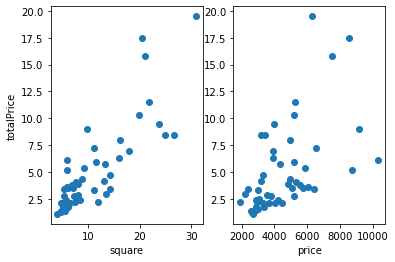

In [8]:
import matplotlib.pyplot as plt
cols = ['square','price']
fig,axes = plt.subplots(1,2)
for i in range(len(axes)):
    axes[i].scatter(data[cols[i]][:50]/10,data['totalPrice'][:50]/100)
    axes[i].set_xlabel(cols[i])
axes[0].set_ylabel('totalPrice')
plt.show()

# 5、数据预处理

In [9]:
# 去除空值
data = data.dropna(axis=0)
# 去除不需要的列（特征）
data_drop = data.drop(['url','id','Cid','tradeTime','DOM','followers','floor','constructionTime','elevator','fiveYearsProperty','subway','communityAverage'],1)
data_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159175 entries, 0 to 317030
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lng                  159175 non-null  float64
 1   Lat                  159175 non-null  float64
 2   totalPrice           159175 non-null  float64
 3   price                159175 non-null  int64  
 4   square               159175 non-null  float64
 5   livingRoom           159175 non-null  object 
 6   drawingRoom          159175 non-null  object 
 7   kitchen              159175 non-null  int64  
 8   bathRoom             159175 non-null  object 
 9   renovationCondition  159175 non-null  int64  
 10  buildingStructure    159175 non-null  int64  
 11  ladderRatio          159175 non-null  float64
 12  district             159175 non-null  int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 17.0+ MB


In [10]:
# 修改列的数据类型：object转成int64
data_ct = data_drop.astype({'livingRoom':'int64','drawingRoom':'int64','drawingRoom':'int64','bathRoom':'int64'})
data_ct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159175 entries, 0 to 317030
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lng                  159175 non-null  float64
 1   Lat                  159175 non-null  float64
 2   totalPrice           159175 non-null  float64
 3   price                159175 non-null  int64  
 4   square               159175 non-null  float64
 5   livingRoom           159175 non-null  int64  
 6   drawingRoom          159175 non-null  int64  
 7   kitchen              159175 non-null  int64  
 8   bathRoom             159175 non-null  int64  
 9   renovationCondition  159175 non-null  int64  
 10  buildingStructure    159175 non-null  int64  
 11  ladderRatio          159175 non-null  float64
 12  district             159175 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 17.0 MB


# 6、特征选择
- 方差过滤法  
这是通过特征本身的方差来筛选特征的类。比如一个特征本身的方差很小，就表示样本在这个特征上基本没有差
异，可能特征中的大多数值都一样，甚至整个特征的取值都相同，那这个特征对于样本区分没有什么作用。
- F检验过滤法    
又称ANOVA，方差齐性检验，是用来捕捉每个特征与标签之间的线性关系的过滤方法。它即可以做回归也 可以做分类，因此包含feature_selection.f_classif（F检验分类）和feature_selection.f_regression（F检验回 归）两个类。其中F检验分类用于标签是离散型变量的数据，而F检验回归用于标签是连续型变量的数据。
- 互信息法    
互信息法是用来捕捉每个特征与标签之间的任意关系（包括线性和非线性关系）的过滤方法。
- 嵌入法     
是一种让算法自己决定使用哪些特征的方法，即特征选择和算法训练同时进行。在使用嵌入法时，我们先使
用某些机器学习的算法和模型进行训练，得到各个特征的权值系数，根据权值系数从大到小选择特征。相比于过滤法，嵌入法的结果会更加精确到模型的效用本身，对于提高模型效力有更好的效果。并且，由于考虑特征对模型的贡献，因此无关的特征（需要相关性过滤的特征）和无区分度的特征（需要方差过滤的特征）都会因为
缺乏对模型的贡献而被删除掉，可谓是过滤法的进化版。

In [11]:
# 获取特征x和目标值y
x = data_ct.loc[:,data_ct.columns != 'totalPrice']
y = data_ct['totalPrice']
x.shape,y.shape

((159175, 12), (159175,))

In [12]:
# 特征选择：方差过滤法
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0)      # 实例化，不填参数默认方差为0
x_var0 = selector.fit_transform(x)             # 获取删除不合格特征之后的新特征矩阵
x_var0.shape

(159175, 12)

In [13]:
# 特征选择：F检验过滤法 
from sklearn.feature_selection import f_classif
F, pvalues_f = f_classif(x_var0,y)
print('F的值为:',F)
print('P的值为:',pvalues_f) # 假设是”数据不存在显著的线性关系，

F的值为: [ 1.06380209  1.328411   29.13867378 21.21355889 10.52673479  6.20624386
  4.41700921 11.79236329  3.59604581  2.24460031  0.04974335  1.11023682]
P的值为: [1.24811093e-03 4.50794128e-47 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.00000000e+00 1.35419736e-07]


In [14]:
# 我们希望选取p值小于0.05或0.01的特征，这些特征与标签时显著线性相关的，而p值大于0.05的特征则被我们认为是和标签没有显著线性关系的特征
k = F.shape[0] - (pvalues_f > 0.05).sum() 
k

11

In [15]:
from sklearn.feature_selection import SelectKBest
# F检验过滤后的x_f
x_f = SelectKBest(f_classif, k=11).fit_transform(x, y)
x_f.shape

(159175, 11)

In [16]:
# 特征选择：互信息法 
from sklearn.feature_selection import mutual_info_classif as MIC
# 返回“每个特征与目标之间的互信息量的估计”，这个估计量在[0,1]之间取值，为0则表示两个变量独立，为1则表示两个变量完全相关
result = MIC(x_var0,y.astype('int64'))
k = result.shape[0] - sum(result <= 0)
k # 互信息法过滤后的特征个数

12

In [17]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor as RFR
# 实例化随机森林回归模型
RFR_ = RFR(n_estimators=10,random_state=0)
# 特征选择：嵌入法
X_embedded = SelectFromModel(RFR_,threshold=0.005).fit_transform(x,y)
X_embedded.shape

(159175, 2)

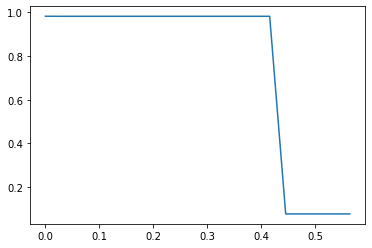

In [18]:
# 嵌入法超参数threshold的学习曲线
from sklearn.model_selection import cross_val_score # 交叉验证
threshold = np.linspace(0,(RFR_.fit(x_var0,y).feature_importances_).max(),20) # 定义超参数threshold取值数组
score = []
for i in threshold:
    X_embedded = SelectFromModel(RFR_,threshold=i).fit_transform(x_var0,y)
    once = cross_val_score(RFR_,X_embedded,y,cv=5,scoring='r2').mean()
    score.append(once)
plt.plot(threshold,score)
plt.show()

In [19]:
# 根据超参数曲线，得到最佳的threshold，并使用嵌入法对数据降维
selector = SelectFromModel(RFR_,threshold=0.1)
X_embedded = selector.fit_transform(x_var0,y)
print(X_embedded.shape) # 降维后的特征形状
print(selector.get_support()) # 哪些特征被保留：True代表保留，False代表丢弃

(159175, 2)
[False False  True  True False False False False False False False False]


In [20]:
# 选出来的两个最相关的特征的列名
print(x.columns[selector.get_support()])

Index(['price', 'square'], dtype='object')


In [21]:
# 5折交叉验证 
cross_val_score(RFR_,X_embedded,y,cv=5,scoring = "r2").mean() # R2

0.9818028593095441

In [22]:
# 5折交叉验证 
cross_val_score(RFR_,X_embedded,y,cv=5,scoring = "neg_mean_absolute_error").mean() # 绝对均值误差

-1.3392032668446685

# 7、划分数据集：训练集和测试集

In [23]:
from sklearn.model_selection import train_test_split
# 将嵌入法降维的特征X_embedded和目标值y划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_embedded,y,test_size=0.3,random_state=22)

# 8、随机森林回归模型拟合数据

In [24]:
RFR_ = RFR(n_estimators=100,random_state=0) # 实例化模型
RFR_.fit(X_train,y_train)  # 模型拟合数据

RandomForestRegressor(random_state=0)

# 9、画出预测值和真实值的折线图

In [25]:
pred = RFR_.predict(X_test) # 在测试集上得到回归预测数据
# 将回归预测值和真实值输出
res = pd.concat([pd.Series(pred,name='pred'),pd.Series(y_test.to_numpy(),name='label')],axis=1)
res.head(10)

,pred,label
0,335.121,335.0
1,182.318,182.0
2,356.983,357.0
3,329.811,330.0
4,255.033,255.0
5,144.675,144.5
6,186.749,186.0
7,944.620,945.0
8,184.753,184.5
9,219.005,219.0


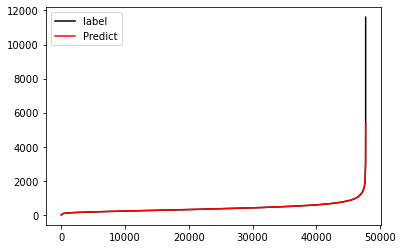

In [26]:
# 显示随机随林回归模型在测试集上的拟合结果
plt.plot(range(len(y_test)),sorted(y_test),c="black",label= "label")
plt.plot(range(len(pred)),sorted(pred),c="red",label = "Predict")
plt.legend()
plt.show()

上图说明模型前大部分拟合的很好，后面一点点没有很好的拟合，大部分的均方误差来源于后面一小部分。   
结论：房价的总价格(totalPrice)主要受每平方米价格(price)和房子面积(square)影响。

# 10、使用多元线性回归求解方程

In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

In [30]:
lr_res = pd.concat([pd.Series(lr_pred,name='pred'),pd.Series(y_test.to_numpy(),name='label')],axis=1)
lr_res.head(10)

,pred,label
0,317.438608,335.0
1,148.828350,182.0
2,351.704880,357.0
3,320.301878,330.0
4,254.965651,255.0
5,78.157088,144.5
6,132.624707,186.0
7,824.288486,945.0
8,137.698770,184.5
9,180.029005,219.0


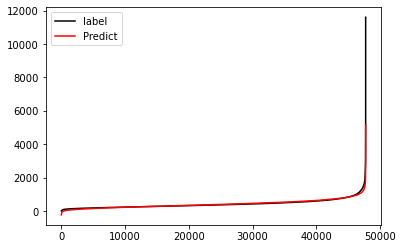

In [31]:
# 显示线性回归模型在测试集上的拟合结果
plt.plot(range(len(y_test)),sorted(y_test),c="black",label= "label")
plt.plot(range(len(lr_pred)),sorted(lr_pred),c="red",label = "Predict")
plt.legend()
plt.show()

In [35]:
print('线性回归模型参数:',lr.coef_)
print('线性回归模型截距:',lr.intercept_)

线性回归模型参数: [0.00786056 5.00451717]
线性回归模型截距: -409.00760080489505


线性回归和随机森林回归模型结果差不多，可求得线性回归方程为：y = 0.00786056* x1 + 5.00451717 * x2 - 409.00760080489505